In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
import timeit
import numpy as np
import time
import html
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import nltk
import warnings
warnings.filterwarnings("ignore")
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
pip install polyglot

In [ ]:
pip install pyicu

In [ ]:
pip install pycld2

In [ ]:
import pandas as pd

# Path to your JSONL file
jsonl_file_path = '/content/drive/MyDrive/All_Beauty.jsonl'

# Load JSONL file into a DataFrame
df = pd.read_json(jsonl_file_path, lines=True)

# Display the DataFrame
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True


In [ ]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
def text_cleaning(text):

  # Video Tag Removal
    pattern = re.compile(r'\[\[VIDEOID:[a-f0-9]+\]\]')
    text = re.sub(pattern, '', text)

  # HTML tag Removal
    html_pattern = re.compile('<.*?>')
    text = re.sub(html_pattern, ' ', text)

  # HTML Entities Removal
    decoded_text = html.unescape(text)
    text = decoded_text

  # Decontracted
    text = decontracted(text)

  # Punctuation Removal
    punctuation_set = set(string.punctuation)
    clean_text = ''.join(char if char not in punctuation_set else ' ' for char in text)
    text = ' '.join(clean_text.split())

  # Special Symbols Removal
    pattern = re.compile(r'[^a-zA-Z0-9\s]')
    text = re.sub(pattern, '', text)

  # ---
    text = re.sub(r'[^\w\s]','',text)

  # LowerCase Transformation
    text = text.lower()

    return text;

In [ ]:
def remove_stopwords(text, exclude_words=None):

    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    cleaned_words = [lemmatizer.lemmatize(word, pos='v') for word in words if word.lower() not in stop_words or word.lower() in exclude_words]
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text


In [ ]:
exclude_words = ["not","don't", 'should', "should've", "mightn't", 'mustn', "mustn't",'shouldn',
                "shouldn't", 'wasn', "wasn't", 'weren', "weren't", "won't", 'wouldn', "wouldn't",
                "couldn't","didn't","doesn't","hadn't","haven't",]

In [ ]:
def preprocess_text(text):

  #Removing characters which are not alphabets or numbers
   cleanend_text = text_cleaning(text)
   cleaned_text = remove_stopwords(cleanend_text, exclude_words=exclude_words)

   return cleaned_text

In [ ]:
df['text'] = df['text'].astype(str)

df['Cleaned_Text'] = df['text'].apply(lambda x: preprocess_text(x))

In [ ]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,Cleaned_Text
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True,spray really nice smell really good go really ...
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True,product need wish odorless soft coconut smell ...
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True,smell good feel great
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True,felt synthetic
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True,love


In [ ]:
from polyglot.detect import Detector

In [ ]:
def detect_language(text):
    try:
        lang = Detector(text).languages[0].code  # Get the language code
    except:
        lang = None  # Return None if language detection fails
    return lang

# Apply the function to each row in the DataFrame
df['Language'] = df['Cleaned_Text'].apply(detect_language)

In [ ]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,Cleaned_Text,Language
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True,spray really nice smell really good go really ...,en
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True,product need wish odorless soft coconut smell ...,en
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True,smell good feel great,en
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True,felt synthetic,en
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True,love,en


In [ ]:
df = df[df['Language'] == 'en']

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

def extract_aspect(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    aspects = [token[0] for token in tagged_tokens if token[1] in ["NN", "NNS"]]
    return aspects

In [ ]:
df['Aspects'] = df['Cleaned_Text'].apply(extract_aspect)

In [ ]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,Cleaned_Text,Language,Aspects
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True,spray really nice smell really good go really ...,en,"[spray, smell, trick, need, lot, texture, lot,..."
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True,product need wish odorless soft coconut smell ...,en,"[product, coconut, smell, orange, coffee, gran..."
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True,smell good feel great,en,[feel]
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True,felt synthetic,en,[]
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True,love,en,[love]


In [ ]:
def remove_duplicates(lst):
    seen = set()
    return [x for x in lst if not (x in seen or seen.add(x))]

# Apply the function to the 'Aspects' column
df['Aspects'] = df['Aspects'].apply(remove_duplicates)

In [ ]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,Cleaned_Text,Language,Aspects
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True,spray really nice smell really good go really ...,en,"[spray, smell, trick, need, lot, texture, hair..."
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True,product need wish odorless soft coconut smell ...,en,"[product, coconut, smell, orange, coffee, gran..."
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True,smell good feel great,en,[feel]
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True,felt synthetic,en,[]
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True,love,en,[love]


In [ ]:
df.to_csv('amazon_reviews_with_aspects.csv', index=False)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/amazon_reviews_with_aspects.csv');

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

model_name = "yangheng/deberta-v3-base-absa-v1.1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

def classify_aspects(row):
    aspects_list = row['Aspects']
    cleaned_text = row['Cleaned_Text']
    results = {}
    for aspect in aspects_list:
        result = classifier(cleaned_text, text_pair=aspect)
        results[aspect] = result
    return results

tokenizer_config.json:   0%|          | 0.00/372 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/18.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/738M [00:00<?, ?B/s]

In [ ]:
import ast
df1['Aspect_Sentiments'] = None
for index, row in df1.iterrows():
    aspect_list = ast.literal_eval(df1['Aspects'][index])
    diction = {}
    for aspect in aspect_list:
      diction[aspect] = classifier(df1['Cleaned_Text'][index],  text_pair=aspect)[0]['label']
    if len(diction) > 0:
      df1.at[index, 'Aspect_Sentiments'] = diction

In [ ]:
df1.to_csv('amazon_reviews_with_sentiments_final.csv', index=False)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/amazon_reviews_with_sentiments_final.csv')

In [ ]:
df1.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,Cleaned_Text,Language,Aspects,Aspect_Sentiments
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True,spray really nice smell really good go really ...,en,"['spray', 'smell', 'trick', 'need', 'lot', 'te...","{'spray': 'positive', 'smell': 'positive', 'tr..."
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True,product need wish odorless soft coconut smell ...,en,"['product', 'coconut', 'smell', 'orange', 'cof...","{'product': 'positive', 'coconut': 'positive',..."
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True,smell good feel great,en,['feel'],{'feel': 'positive'}
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True,felt synthetic,en,[],NaN
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True,love,en,['love'],{'love': 'positive'}


In [ ]:
meta_data = pd.read_csv('/content/drive/MyDrive/meta_data.csv')

In [ ]:
meta_data.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,All Beauty,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Howard Products,[],{'Package Dimensions': '7.1 x 5.5 x 3 inches; ...,B01CUPMQZE,NaN
1,All Beauty,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Yes To,[],"{'Item Form': 'Powder', 'Skin Type': 'Acne Pro...",B076WQZGPM,NaN
2,All Beauty,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Levine Health Products,[],{'Manufacturer': 'Levine Health Products'},B000B658RI,NaN
3,All Beauty,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Cherioll,[],"{'Brand': 'Cherioll', 'Item Form': 'Powder', '...",B088FKY3VD,NaN
4,All Beauty,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,"['Material: 304 Stainless Steel; Brass tip', '...",['The Precision Plunger Bars are designed to w...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Precision,[],{'UPC': '644287689178'},B07NGFDN6G,NaN


In [ ]:
df_merged = pd.merge(df1, meta_data[['parent_asin', 'average_rating']], on='parent_asin', how='left')

In [ ]:
df_merged.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,Cleaned_Text,Language,Aspects,Aspect_Sentiments,average_rating
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True,spray really nice smell really good go really ...,en,"['spray', 'smell', 'trick', 'need', 'lot', 'te...","{'spray': 'positive', 'smell': 'positive', 'tr...",4.3
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True,product need wish odorless soft coconut smell ...,en,"['product', 'coconut', 'smell', 'orange', 'cof...","{'product': 'positive', 'coconut': 'positive',...",4.0
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True,smell good feel great,en,['feel'],{'feel': 'positive'},4.4
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True,felt synthetic,en,[],{},1.0
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True,love,en,['love'],{'love': 'positive'},3.5


In [ ]:
df_merged.to_csv('amazon_reviews_merged.csv', index=False)

In [ ]:
df_merged.shape

(682065, 15)

In [ ]:
print(len(list(df_merged['parent_asin'].unique())))

111090


In [ ]:
df_merged = pd.read_csv('/content/drive/MyDrive/amazon_reviews_merged.csv')

In [ ]:
df_merged.head(5)

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,Cleaned_Text,Language,Aspects,Aspect_Sentiments,average_rating
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True,spray really nice smell really good go really ...,en,"['spray', 'smell', 'trick', 'need', 'lot', 'te...","{'spray': 'positive', 'smell': 'positive', 'tr...",4.3
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True,product need wish odorless soft coconut smell ...,en,"['product', 'coconut', 'smell', 'orange', 'cof...","{'product': 'positive', 'coconut': 'positive',...",4.0
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True,smell good feel great,en,['feel'],{'feel': 'positive'},4.4
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True,felt synthetic,en,[],NaN,1.0
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True,love,en,['love'],{'love': 'positive'},3.5


In [ ]:
min_year = df_merged['timestamp'].min()

In [ ]:
min_year_rows = df[df['timestamp'] == 2018]

# Extract the parent_asin with the minimum year
min_year_parent_asin = min_year_rows['parent_asin'].iloc[1]

In [ ]:
min_year_parent_asin

'B07FX94GYX'

In [ ]:
def get_top_10_frequent_aspects_for_product(aspect_occurrences_dict, product_name):
    if product_name not in aspect_occurrences_dict:
        return []

    aspects = aspect_occurrences_dict[product_name]

    # Sort the aspects based on total occurrences in descending order
    sorted_aspects = sorted(aspects.items(), key=lambda x: x[1], reverse=True)

    # Get the top 10 frequent aspects for the product
    top_10_frequent_aspects = sorted_aspects[:10]

    return top_10_frequent_aspects

# Specify the product name for which you want to find the top 10 frequent aspects
product_name = 'B00YQ6X8EO'

# Get the top 10 frequent aspects for the specified product
top_10_aspects_for_product = get_top_10_frequent_aspects_for_product(res_pos, product_name)

# Print the top 10 frequent aspects for the specified product
print(f"Top 10 Frequent Aspects for {product_name}:")
for aspect, total_occurrences in top_10_aspects_for_product:
    print(f"{aspect}: {total_occurrences}")

Top 10 Frequent Aspects for B00YQ6X8EO:
hair: 55
smell: 36
product: 24
spray: 18
use: 15
texture: 14
curl: 11
scent: 11
love: 10
look: 10


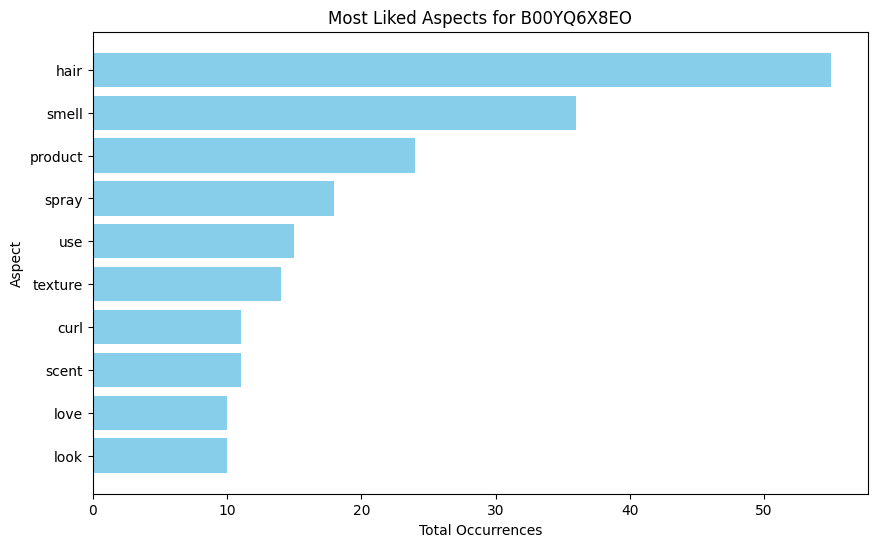

In [ ]:
import matplotlib.pyplot as plt

aspects = [aspect for aspect, _ in top_10_aspects_for_product]
occurrences = [occurrence for _, occurrence in top_10_aspects_for_product]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(aspects, occurrences, color='skyblue')
plt.xlabel('Total Occurrences')
plt.ylabel('Aspect')
plt.title(f'Most Liked Aspects for {product_name}')
plt.gca().invert_yaxis()  # Invert y-axis to show the most frequent aspect at the top
plt.show()

In [ ]:
def get_top_10_frequent_aspects_for_product(aspect_occurrences_dict, product_name):
    if product_name not in aspect_occurrences_dict:
        return []

    aspects = aspect_occurrences_dict[product_name]

    # Sort the aspects based on total occurrences in descending order
    sorted_aspects = sorted(aspects.items(), key=lambda x: x[1], reverse=True)

    # Get the top 10 frequent aspects for the product
    top_10_frequent_aspects = sorted_aspects[:10]

    return top_10_frequent_aspects

# Specify the product name for which you want to find the top 10 frequent aspects
product_name = 'B00YQ6X8EO'

# Get the top 10 frequent aspects for the specified product
top_10_aspects_for_product_neg = get_top_10_frequent_aspects_for_product(res_neg, product_name)

# Print the top 10 frequent aspects for the specified product
print(f"Top 10 Frequent Aspects for {product_name}:")
for aspect, total_occurrences in top_10_aspects_for_product_neg:
    print(f"{aspect}: {total_occurrences}")

Top 10 Frequent Aspects for B00YQ6X8EO:
spray: 5
hair: 4
product: 4
use: 3
scent: 3
sea: 2
bottle: 2
salt: 2
time: 2
feel: 2


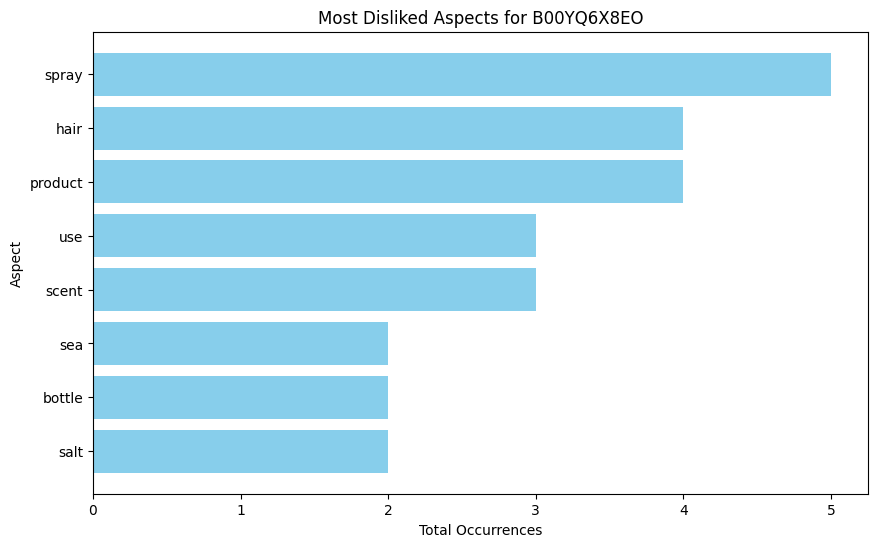

In [ ]:
import matplotlib.pyplot as plt

aspects = [aspect for aspect, _ in top_10_aspects_for_product_neg][:8]
occurrences = [occurrence for _, occurrence in top_10_aspects_for_product_neg][:8]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(aspects, occurrences, color='skyblue')
plt.xlabel('Total Occurrences')
plt.ylabel('Aspect')
plt.title(f'Most Disliked Aspects for {product_name}')
plt.gca().invert_yaxis()  # Invert y-axis to show the most frequent aspect at the top
plt.show()

In [ ]:
import pandas as pd
import ast

res_dict = {}

for i, row in df_merged.iterrows():
  parId = row['parent_asin'];
  if parId not in res_dict:
    res_dict[parId] = {}

In [ ]:
for i, row in df_merged.iterrows():
  parId = row['parent_asin']
  aspect = ast.literal_eval(row['Aspects'])
  for el in aspect:
    res_dict[parId][el] = res_dict[parId].get(el, 0) + 1;

In [ ]:
import ast

# Function to parse aspect sentiment dictionary and return positive and negative counts
def parse_sentiment(aspect_sentiment):
    if pd.isnull(aspect_sentiment):  # Check if the value is NaN
        return np.nan, np.nan  # Return NaN for both counts if it's NaN
    aspect_sentiment = ast.literal_eval(aspect_sentiment)  # Convert string to dictionary
    positive_count = sum(1 for aspect, sentiment in aspect_sentiment.items() if sentiment == 1)
    negative_count = sum(1 for aspect, sentiment in aspect_sentiment.items() if sentiment == 0)
    return positive_count, negative_count

# Apply the function to each row
df_merged['positive_count'], df_merged['negative_count'] = zip(*df_merged['Aspect_Sentiments'].apply(parse_sentiment))

# Group by aspect, then sum up positive and negative counts
aspect_sentiments = df_merged.explode('Aspects').groupby('Aspects')[['positive_count', 'negative_count']].sum().reset_index()

In [ ]:
df_merged['Aspect_Sentiments'] = df_merged['Aspect_Sentiments'].fillna('{}')

In [ ]:
import ast
import numpy as np

res_pos = {}
res_neg = {}

for i, row in df_merged.iterrows():
    temp = row['Aspect_Sentiments']
    parent_asin = row['parent_asin']
    aspect_sentiment = ast.literal_eval(temp)
    if parent_asin not in res_pos:
        res_pos[parent_asin] = {}
    if parent_asin not in res_neg:
        res_neg[parent_asin] = {}
    for key, value in aspect_sentiment.items():
        if value == 'positive':
          res_pos[parent_asin][key] = res_pos[parent_asin].get(key, 0) + 1
        elif value == 'negative':
          res_neg[parent_asin][key] = res_neg[parent_asin].get(key, 0) + 1

In [ ]:
res_pos_pct = {}
res_neg_pct = {}

for key, value in res_pos.items():
    if key:
        if key not in res_pos_pct:
            res_pos_pct[key] = {}
        if key not in res_neg_pct:
            res_neg_pct[key] = {}

        for k, v in res_dict[key].items():
            if k in res_pos[key]:
                res_pos_pct[key][k] = res_pos_pct[key].get(k, 0) + (res_pos[key][k] / v)
            if k in res_neg[key]:
                res_neg_pct[key][k] = res_neg_pct[key].get(k, 0) + (res_neg[key][k] / v)

In [ ]:
res_pos_pct['B00YQ6X8EO']

In [ ]:
res_neg_pct['B00YQ6X8EO']

In [ ]:
temp = {
   'spray': 0.75,
 'smell': 0.9473684210526315,
 'texture': 0.9333333333333333,
 'hair': 0.9016393442622951,
 'products': 0.6666666666666666,
}

temp

{'spray': 0.75,
 'smell': 0.9473684210526315,
 'texture': 0.9333333333333333,
 'hair': 0.9016393442622951,
 'products': 0.6666666666666666}

In [ ]:
tot_sentiments = {}

for parId, value in res_pos.items():
  if parId not in tot_sentiments:
    tot_sentiments[parId] = {'pos' : 0, 'neg' : 0, 'pos_pct' : 0, 'neg_pct' : 0}
  for k, v in value.items():
    tot_sentiments[parId]['pos'] += v
  for k, v in res_neg[parId].items():
    tot_sentiments[parId]['neg'] += v

  size = tot_sentiments[parId]['pos'] + tot_sentiments[parId]['neg']
  tot_sentiments[parId]['pos_pct'] = tot_sentiments[parId]['pos'] / (1 if size == 0 else size)
  tot_sentiments[parId]['neg_pct'] = tot_sentiments[parId]['neg'] / (1 if size == 0 else size)

In [ ]:
maxi = 0
maxAsp = ''
mini = 0
minAsp = ''

for k, v in res_pos['B00YQ6X8EO'].items():
  if v > maxi:
    maxi = v
    maxAsp = k

for k, v in res_neg['B00YQ6X8EO'].items():
  if v > mini:
    mini = v
    minAsp = k

In [ ]:
print(maxAsp, maxi)
print(minAsp, mini)

hair 55
spray 5


In [ ]:
print(df_merged.iloc[0: 1]['text'])

0    This spray is really nice. It smells really go...
Name: text, dtype: object


In [ ]:
# Assuming your dataset is stored in a DataFrame named df
# First, group by parent_asin and count the number of reviews for each parent_asin
review_counts = df_merged.groupby('parent_asin')['asin'].count()

# Filter the parent_asin with more than 30 reviews
parent_asin_gt_30_reviews = review_counts[review_counts > 30].index.tolist()

# Print the parent_asin with more than 30 reviews
print("Parent ASIN with more than 30 reviews:", len(parent_asin_gt_30_reviews))


Parent ASIN with more than 30 reviews: 3447


In [ ]:
res_ratings = {}

for i, row in df_merged.iterrows():
  parID = row['parent_asin'];
  if parID not in res_ratings:
    res_ratings[parID] = row['average_rating']

In [ ]:
positive_counts = []
product_ids = []
ratings = []
negative_counts = []
parent_asin_map = {}  # Dictionary to map parent_asin with unique identifiers

counter = 1  # Counter for generating unique identifiers

for el in parent_asin_gt_30_reviews:
    product_ids.append(f"PD{counter}")  # Append unique identifier to product_ids
    parent_asin_map[f"PD{counter}"] = el  # Map unique identifier to parent_asin
    counter += 1

    cnt_pos = sum(res_pos[el].values())  # Sum positive counts
    positive_counts.append(cnt_pos)

    cnt_neg = sum(res_neg[el].values())  # Sum negative counts
    negative_counts.append(cnt_neg)

    ratings.append(res_ratings[el])

In [ ]:
positive_counts = positive_counts[:20]
product_ids = product_ids[:20]
ratings = ratings[:20]
negative_counts = negative_counts[:20]

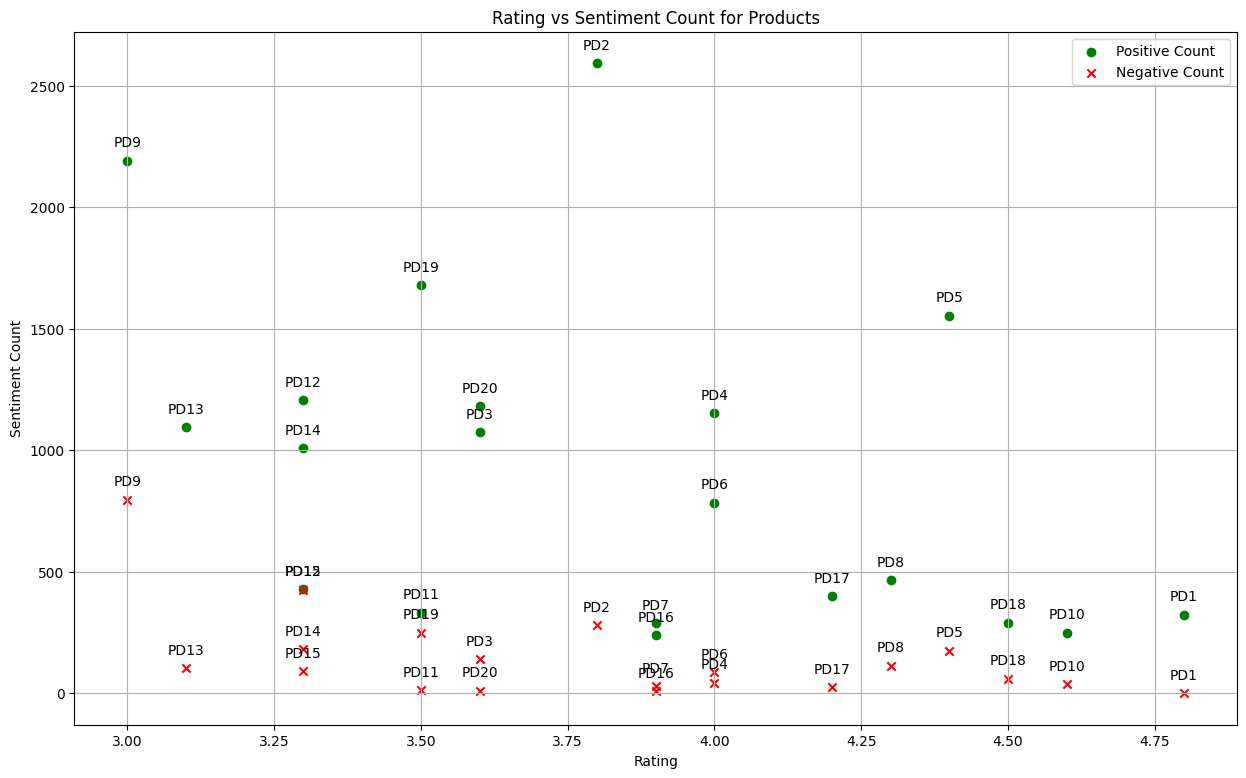

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(15, 9))

# Plot positive counts
plt.scatter(ratings, positive_counts, color='green', label='Positive Count', marker='o')

# Plot negative counts
plt.scatter(ratings, negative_counts, color='red', label='Negative Count', marker='x')

# Annotate points with product IDs
for i, product_id in enumerate(product_ids):
    plt.annotate(product_id, (ratings[i], positive_counts[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(product_id, (ratings[i], negative_counts[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Set plot labels and title
plt.xlabel('Rating')
plt.ylabel('Sentiment Count')
plt.title('Rating vs Sentiment Count for Products')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [ ]:
df_merged.head(5)

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,Cleaned_Text,Language,Aspects,Aspect_Sentiments,average_rating
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020,0,True,spray really nice smell really good go really ...,en,"['spray', 'smell', 'trick', 'need', 'lot', 'te...","{'spray': 'positive', 'smell': 'positive', 'tr...",4.3
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020,1,True,product need wish odorless soft coconut smell ...,en,"['product', 'coconut', 'smell', 'orange', 'cof...","{'product': 'positive', 'coconut': 'positive',...",4.0
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020,2,True,smell good feel great,en,['feel'],{'feel': 'positive'},4.4
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022,0,True,felt synthetic,en,[],NaN,1.0
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020,0,True,love,en,['love'],{'love': 'positive'},3.5


In [ ]:
df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'])
df_merged['timestamp'] = df_merged['timestamp'].dt.year

In [ ]:
min_year = df_merged['timestamp'].min()
max_year = df_merged['timestamp'].max()

res_time = {}

for i in range(min_year, max_year + 1):
  res_time[i] = {'pos' : 0, 'neg' : 0}

In [ ]:
res_t2 = {}

for i in range(min_year, max_year + 1):
  res_t2[i] = {'pos' : 0, 'neg' : 0}

In [ ]:
for i, row in df_merged.iterrows():
  parId = row['parent_asin']
  if parId == 'B09JS339BZ':
    year = row['timestamp']
    asp = row['Aspect_Sentiments']
    aspect_sentiment = ast.literal_eval(asp)
    for key, value in aspect_sentiment.items():
      if value == 'positive':
        res_t2[year]['pos']+= 1
      elif value == 'negative':
        res_t2[year]['neg']+= 1

In [ ]:
for i, row in df_merged.iterrows():
  parId = row['parent_asin']
  if parId == 'B00YQ6X8EO':
    year = row['timestamp']
    asp = row['Aspect_Sentiments']
    aspect_sentiment = ast.literal_eval(asp)
    for key, value in aspect_sentiment.items():
      if value == 'positive':
        res_time[year]['pos']+= 1
      elif value == 'negative':
        res_time[year]['neg']+= 1

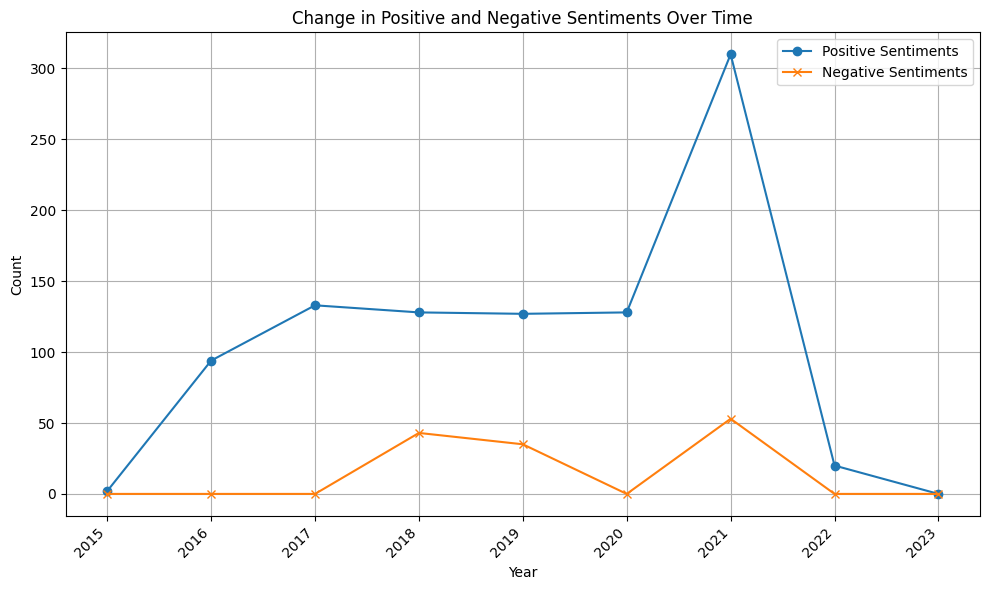

In [ ]:
data = res_time


years = list(data.keys())
positive_counts = [entry['pos'] for entry in data.values()]
negative_counts = [entry['neg'] for entry in data.values()]

# Find the first non-zero index for either positive or negative counts
start_index = next((i for i, (pos, neg) in enumerate(zip(positive_counts, negative_counts)) if pos != 0 or neg != 0), 0)

# Filter data from the first non-zero index
years_filtered = years[start_index:]
positive_counts_filtered = positive_counts[start_index:]
negative_counts_filtered = negative_counts[start_index:]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years_filtered, positive_counts_filtered, label='Positive Sentiments', marker='o')
plt.plot(years_filtered, negative_counts_filtered, label='Negative Sentiments', marker='x')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Change in Positive and Negative Sentiments Over Time')
plt.legend()
plt.grid(True)
plt.xticks(years_filtered, rotation=45, ha='right')  # Rotate and align x-axis labels
plt.tight_layout()
plt.show()

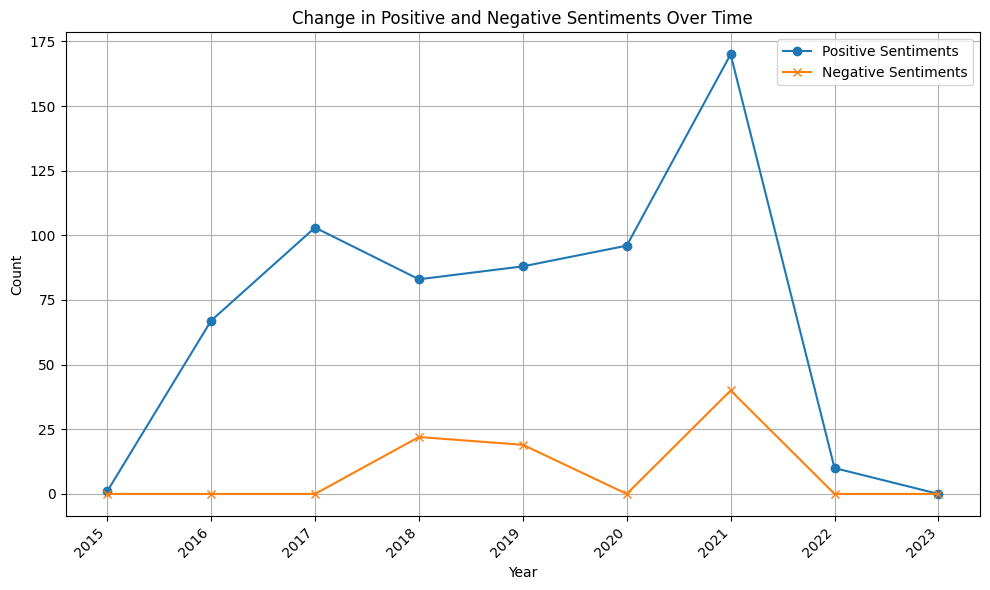

In [ ]:
data = res_t2


years = list(data.keys())
positive_counts = [entry['pos'] for entry in data.values()]
negative_counts = [entry['neg'] for entry in data.values()]

# Find the first non-zero index for either positive or negative counts
start_index = next((i for i, (pos, neg) in enumerate(zip(positive_counts, negative_counts)) if pos != 0 or neg != 0), 0)

# Filter data from the first non-zero index
years_filtered = years[start_index:]
positive_counts_filtered = positive_counts[start_index:]
negative_counts_filtered = negative_counts[start_index:]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years_filtered, positive_counts_filtered, label='Positive Sentiments', marker='o')
plt.plot(years_filtered, negative_counts_filtered, label='Negative Sentiments', marker='x')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Change in Positive and Negative Sentiments Over Time')
plt.legend()
plt.grid(True)
plt.xticks(years_filtered, rotation=45, ha='right')  # Rotate and align x-axis labels
plt.tight_layout()
plt.show()

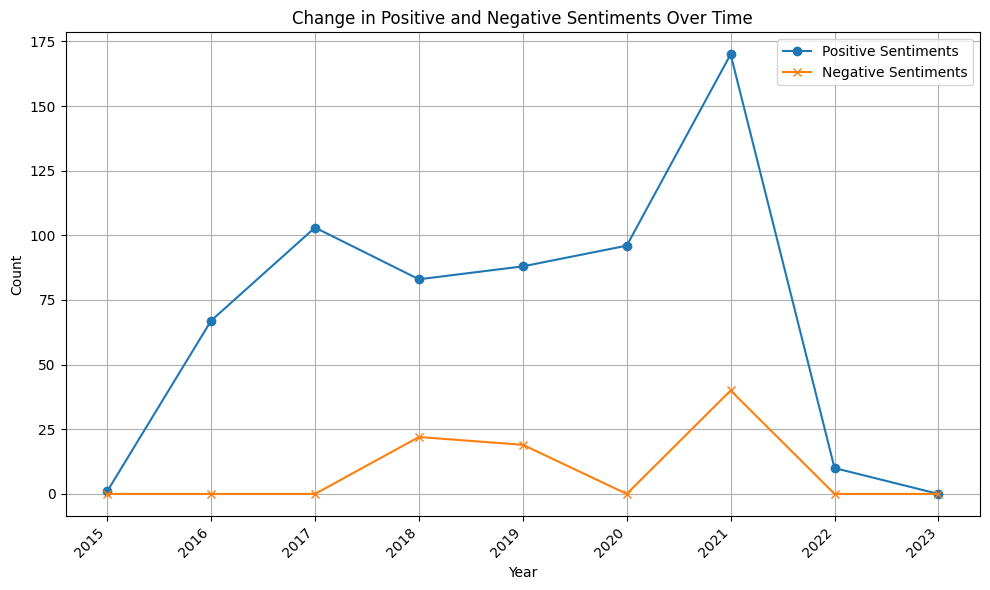

In [ ]:
data = res_t2


years = list(data.keys())
positive_counts = [entry['pos'] for entry in data.values()]
negative_counts = [entry['neg'] for entry in data.values()]

# Find the first non-zero index for either positive or negative counts
start_index = next((i for i, (pos, neg) in enumerate(zip(positive_counts, negative_counts)) if pos != 0 or neg != 0), 0)

# Filter data from the first non-zero index
years_filtered = years[start_index:]
positive_counts_filtered = positive_counts[start_index:]
negative_counts_filtered = negative_counts[start_index:]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years_filtered, positive_counts_filtered, label='Positive Sentiments', marker='o')
plt.plot(years_filtered, negative_counts_filtered, label='Negative Sentiments', marker='x')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Change in Positive and Negative Sentiments Over Time')
plt.legend()
plt.grid(True)
plt.xticks(years_filtered, rotation=45, ha='right')  # Rotate and align x-axis labels
plt.tight_layout()
plt.show()